# Panel Data Exploration - Cambodia
### By CDSS Modules Team

This lab seeks to introduce students to pandas and data visualizations by exploring panal data. We will use data from the Economic Transformation Database (ETD) which presents the following internationally comparable sectoral data on employment and producitivity in Africa, Asia, and Latin America. Feel free to further explore the data at https://www.wider.unu.edu/database/etd-economic-transformation-database.

Kruse, H., E. Mensah, K. Sen, and G. J. de Vries (2022). “A manufacturing renaissance? Industrialization trends in the developing world”, IMF Economic Review DOI: 10.1057/s41308-022-00183-7

License: The GGDC/UNU-WIDER Economic Transformation Database is licensed under a Creative Commons Attribution 4.0 International License.

But first, we will import the following libraries that we will help us analyze the data.

In [7]:
import pandas as pd


In [11]:
ETDdf = pd.read_csv("https://raw.githubusercontent.com/ds-modules/DS4Cambodia/main/ETD.csv",thousands=',')
ETDdf


,country,cnt,var,year,Agriculture,Mining,Manufacturing,Utilities,Construction,Trade services,Transport services,Business services,Financial services,Real estate,Government services,Other services,Total,War flag
0,Argentina,ARG,VA,1990,8317,2710,43779,4175,6444,19510,5723,7538,3118,"3,747",11015,4417,120491,0
1,Argentina,ARG,VA,1991,18048,5130,104598,9189,17712,52132,14934,20373,8429,"10,127",33674,13505,307851,0
2,Argentina,ARG,VA,1992,20187,5595,117573,12033,25485,63450,18577,28097,11624,"13,966",44329,17778,378694,0
3,Argentina,ARG,VA,1993,20859,5868,124614,13787,33096,69000,20634,33559,13883,"16,680",51019,20461,423460,0
4,Argentina,ARG,VA,1994,22466,6355,132515,14605,35366,75152,23342,32498,13445,"16,153",54847,21511,448254,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4432,Zambia,ZMB,EMP,2014,2548,64,207,23,119,763,98,128,19,10,250,236,4465,0
4433,Zambia,ZMB,EMP,2015,2626,62,226,23,138,818,104,138,23,11,251,245,4667,0
4434,Zambia,ZMB,EMP,2016,2712,65,242,20,152,881,109,127,25,13,267,301,4915,0
4435,Zambia,ZMB,EMP,2017,2806,58,234,22,145,855,112,106,23,32,334,280,5009,0


We have successfully imported the data! However, before we begin we must understand the data that we are working with and adjust it such that it will be ideal to work with.

In [12]:
ETDdf.shape

(4437, 18)

In [13]:
ETDdf.dtypes

country                object
cnt                    object
var                    object
year                    int64
Agriculture             int64
Mining                  int64
Manufacturing           int64
Utilities               int64
Construction            int64
Trade services          int64
Transport services      int64
Business services       int64
Financial services      int64
Real estate            object
Government services     int64
Other services          int64
Total                   int64
War flag                int64
dtype: object

### Introduction to panel data
Panel data (sometimes refered to as longitudinal data or cross-sectional time-series data) is a type of dataset that combines cross-sectional data and time-series data. That is, it involves observations on multiple subjects over a time period. With this dataset, we are looking at employment and productivity overtime in different economies in Africa, Asia, and Latin America.

### Let's pull out the data for Cambodia from the bigger dataset

First, lets say we are interested in studying the Cambodia economy. The following transforms the dataset into a time-series dataset.

Cambodia = "KHM"

In [14]:
df_khm= df[df['cnt'] == 'KHM']
df_khm

,country,cnt,var,year,Agriculture,Mining,Manufacturing,Utilities,Construction,Trade services,Transport services,Business services,Financial services,Real estate,Government services,Other services,Total,War flag
522,Cambodia,KHM,VA,1990,359075,13438,52368,1313,16858,96352,46211,68219,11477,"4,536",32209,14410,716466,0
523,Cambodia,KHM,VA,1991,717262,20138,118400,4236,44153,296128,88305,153807,25966,"10,262",78247,39189,1596092,0
524,Cambodia,KHM,VA,1992,1292093,36574,212008,9931,99784,558903,176516,286360,48275,"19,079",139046,71236,2949806,0
525,Cambodia,KHM,VA,1993,3034330,11040,489560,24090,231670,1118790,364126,533042,89658,"35,434",285977,147373,6365090,0
526,Cambodia,KHM,VA,1994,3216780,11150,522210,30830,256380,1082130,387295,399079,66468,"26,269",360503,135267,6494360,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,Cambodia,KHM,EMP,2014,4991,8,745,17,304,785,222,116,151,0,398,121,7858,0
605,Cambodia,KHM,EMP,2015,4665,5,766,18,355,850,246,155,131,0,393,126,7709,0
606,Cambodia,KHM,EMP,2016,4281,5,813,21,389,1017,278,185,176,0,465,121,7751,0
607,Cambodia,KHM,EMP,2017,4297,5,906,22,497,1123,313,221,244,0,492,126,8246,0


Now, if we look at just the year 1990, we can see that the data is split up according to three variables.

In [15]:
df_khm_1990 = df_khm[df['year'] == 1990]
df_khm_1990

/var/folders/wx/mgl11c114vv7vpz1f_b7szwr0000gn/T/ipykernel_4083/138805882.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_khm_1990 = df_khm[df['year'] == 1990]


,country,cnt,var,year,Agriculture,Mining,Manufacturing,Utilities,Construction,Trade services,Transport services,Business services,Financial services,Real estate,Government services,Other services,Total,War flag
522,Cambodia,KHM,VA,1990,359075,13438,52368,1313,16858,96352,46211,68219,11477,"4,536",32209,14410,716466,0
551,Cambodia,KHM,VA_Q15,1990,7325578,33412,697634,22745,450395,1669569,832931,1233907,175563,"82,039",670495,249688,13443957,0
580,Cambodia,KHM,EMP,1990,2893,7,44,1,15,170,49,3,0,0,235,44,3462,0


Let's take a closer look at the 'var' column. This column is metadata with the following key:
- VA - Gross value added at current basic prices (millions, local currency)
- VA_Q15 Gross value added at constant 2015 prices (millions, local currency)
- EMP - Number of persons engaged


Let's show Cambodia's total gross value added at current basic prices over time.

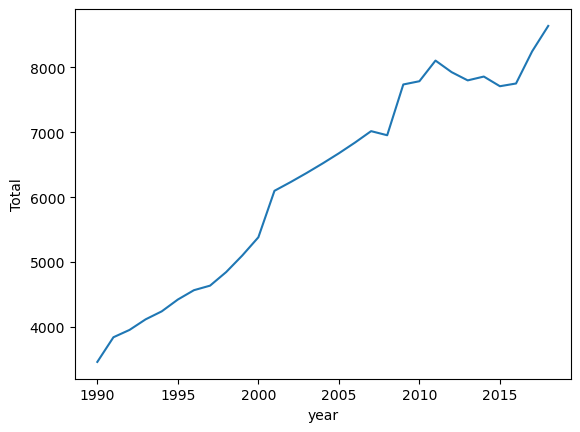

In [19]:
df_khm_VA = df_khm[df_khm['var'] == 'EMP']
sns.lineplot(data=df_khm_VA, x='year', y='Total')
plt.show()

In [20]:
SEA_countries = [
    'Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia',
    'Myanmar', 'Philippines', 'Singapore', 'Thailand',
    'Timor-Leste', 'Viet Nam']

In [22]:
df_se_asia = ETDdf[ETDdf['country'].isin(SEA_countries)]
df_se_asia 


,country,cnt,var,year,Agriculture,Mining,Manufacturing,Utilities,Construction,Trade services,Transport services,Business services,Financial services,Real estate,Government services,Other services,Total,War flag
522,Cambodia,KHM,VA,1990,359075,13438,52368,1313,16858,96352,46211,68219,11477,"4,536",32209,14410,716466,0
523,Cambodia,KHM,VA,1991,717262,20138,118400,4236,44153,296128,88305,153807,25966,"10,262",78247,39189,1596092,0
524,Cambodia,KHM,VA,1992,1292093,36574,212008,9931,99784,558903,176516,286360,48275,"19,079",139046,71236,2949806,0
525,Cambodia,KHM,VA,1993,3034330,11040,489560,24090,231670,1118790,364126,533042,89658,"35,434",285977,147373,6365090,0
526,Cambodia,KHM,VA,1994,3216780,11150,522210,30830,256380,1082130,387295,399079,66468,"26,269",360503,135267,6494360,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4345,Viet Nam,VNM,EMP,2014,24409,253,7415,248,3313,8953,1535,831,352,158,4050,1228,52745,0
4346,Viet Nam,VNM,EMP,2015,23259,238,8083,266,3432,9151,1592,869,365,166,4143,1277,52840,0
4347,Viet Nam,VNM,EMP,2016,22315,236,8867,296,3800,9218,1614,879,376,180,4172,1350,53303,0
4348,Viet Nam,VNM,EMP,2017,21565,211,9316,289,4028,9394,1752,900,384,226,4295,1345,53703,0


In [23]:
df_se_asia_emp = df_se_asia[df_se_asia['var'] == 'EMP']
df_se_asia_emp

,country,cnt,var,year,Agriculture,Mining,Manufacturing,Utilities,Construction,Trade services,Transport services,Business services,Financial services,Real estate,Government services,Other services,Total,War flag
580,Cambodia,KHM,EMP,1990,2893,7,44,1,15,170,49,3,0,0,235,44,3462,0
581,Cambodia,KHM,EMP,1991,3181,7,47,2,17,245,53,4,0,0,231,55,3842,0
582,Cambodia,KHM,EMP,1992,3248,7,51,2,23,273,64,4,1,0,225,57,3955,0
583,Cambodia,KHM,EMP,1993,3327,8,63,3,31,292,81,5,1,0,247,61,4118,0
584,Cambodia,KHM,EMP,1994,3367,7,71,2,38,277,89,4,1,0,312,73,4241,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4345,Viet Nam,VNM,EMP,2014,24409,253,7415,248,3313,8953,1535,831,352,158,4050,1228,52745,0
4346,Viet Nam,VNM,EMP,2015,23259,238,8083,266,3432,9151,1592,869,365,166,4143,1277,52840,0
4347,Viet Nam,VNM,EMP,2016,22315,236,8867,296,3800,9218,1614,879,376,180,4172,1350,53303,0
4348,Viet Nam,VNM,EMP,2017,21565,211,9316,289,4028,9394,1752,900,384,226,4295,1345,53703,0


In [24]:
average_agriculture_employment = df_se_asia_emp.groupby('country')['Agriculture'].mean().sort_values()
average_agriculture_employment

country
Singapore         10.379310
Malaysia        1439.931034
Laos            2125.034483
Cambodia        4408.034483
Philippines    11145.379310
Myanmar        11275.310345
Thailand       13897.172414
Viet Nam       23885.241379
Indonesia      39639.758621
Name: Agriculture, dtype: float64

In [25]:
average_agriculture_employment_df = df_se_asia[df_se_asia['var'] == 'EMP'].groupby('country')['Agriculture'].mean().reset_index()
average_agriculture_employment_df
#Note - reset_index yields a dataframe

,country,Agriculture
0,Cambodia,4408.034483
1,Indonesia,39639.758621
2,Laos,2125.034483
3,Malaysia,1439.931034
4,Myanmar,11275.310345
5,Philippines,11145.379310
6,Singapore,10.379310
7,Thailand,13897.172414
8,Viet Nam,23885.241379


### We can pass in multiple columns to groupby

Here let's ask for three columns

In [26]:
SEA_employment = df_se_asia_emp.groupby('country')[['Agriculture', 'Manufacturing', 'Total']].mean()
SEA_employment

,Agriculture,Manufacturing,Total
country,,,
Cambodia,4408.034483,380.206897,6235.827586
Indonesia,39639.758621,12493.724138,97542.344828
Laos,2125.034483,96.896552,2716.896552
Malaysia,1439.931034,1934.241379,10047.517241
Myanmar,11275.310345,1832.310345,19319.827586
Philippines,11145.379310,2926.655172,31464.896552
Singapore,10.379310,461.034483,2525.758621
Thailand,13897.172414,5229.551724,34129.689655
Viet Nam,23885.241379,5065.275862,42137.586207


In [27]:
SEA_employment['Agr_Percent'] = (SEA_employment['Agriculture'] / SEA_employment['Total']) * 100
SEA_employment['Manu_Percent'] = (SEA_employment['Manufacturing'] / SEA_employment['Total']) * 100
SEA_employment

,Agriculture,Manufacturing,Total,Agr_Percent,Manu_Percent
country,,,,,
Cambodia,4408.034483,380.206897,6235.827586,70.688845,6.097136
Indonesia,39639.758621,12493.724138,97542.344828,40.638513,12.808513
Laos,2125.034483,96.896552,2716.896552,78.215510,3.566442
Malaysia,1439.931034,1934.241379,10047.517241,14.331212,19.250939
Myanmar,11275.310345,1832.310345,19319.827586,58.361340,9.484093
Philippines,11145.379310,2926.655172,31464.896552,35.421630,9.301334
Singapore,10.379310,461.034483,2525.758621,0.410938,18.253307
Thailand,13897.172414,5229.551724,34129.689655,40.718719,15.322588
Viet Nam,23885.241379,5065.275862,42137.586207,56.683934,12.020802
